# Twitter Sentiment Analysis

Introduction
In today’s digital age, social media platforms like Twitter serve as a vital space for customers to express their opinions and sentiments regarding products and brands. As consumers increasingly turn to these platforms to voice their experiences, understanding the sentiment behind their tweets becomes crucial for businesses. This sentiment analysis project aims to analyze tweets related to Apple and Google products to gauge public perception, identify trends, and inform strategic decision-making. By employing advanced natural language processing (NLP) techniques, we can extract valuable insights from the vast volume of unstructured text data, enabling companies to enhance customer satisfaction and adapt to market demands effectively.

Objectives

1. Understanding Customer Sentiment:

To analyze the sentiment of tweets regarding Apple and Google products, providing a clear understanding of how consumers perceive these brands.

2. Identifying Trends:

To identify key trends and patterns in consumer sentiment over time, which can inform product development and marketing strategies.

3. Improving Brand Strategy:

To offer actionable insights that can help Apple and Google refine their customer engagement strategies, enhance product offerings, and address customer concerns effectively.

4. Developing a Sentiment Classification Model:

To build and validate a robust sentiment classification model that accurately categorizes tweets as positive, negative, or neutral.

5. Enhancing Decision-Making:

To equip stakeholders with data-driven insights that support strategic decision-making and improve overall customer satisfaction and brand loyalty.

# Data Preparation

In [13]:
import pandas as pd

# Load the dataset
file_path = '../data/judge-1377884607_tweet_product_company.csv'
print(file_path)
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

../data/judge-1377884607_tweet_product_company.csv


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [16]:
# Drop rows with NaN in 'tweet_text' column
df = df.dropna(subset=['tweet_text'])


In [17]:

# Define Keywords
brands = ['Apple', 'Google']
products = ['iPhone', 'Pixel', 'MacBook', 'Google Home']

# Function to classify tweets
def classify_tweet(tweet):
    brand_related = any(brand in tweet for brand in brands)
    product_related = any(product in tweet for product in products)
    
    if brand_related and product_related:
        return 'Both'
    elif brand_related:
        return 'Brand'
    elif product_related:
        return 'Product'
    else:
        return 'None'

# Apply classification
df['classification'] = df['tweet_text'].apply(classify_tweet)

print(df)

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
9088       

# Data preprocessing

In [18]:
# drop rows with missing sentiment or text data
df_cleaned= df.dropna(subset=['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product'])


In [19]:
# Text cleaning: Remove
import re
import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
   tweet = tweet.lower() # convert to lowercase 
   tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE) # Remove urls
   tweet = re.sub(r'@\w+', '', tweet) # remove mentions
   tweet = re.sub(r'#', '', tweet) # remove haashtags
   tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) # remove special characters
   tweet = ' '.join([word for word in tweet.split() if word not in stop_words]) # remove stopwords
   tweet = tweet.strip() # strip leading/training whitespace

   return tweet
    
# Apply the cleaning function to the 'tweet_text' column
df_cleaned['clean_tweet'] = df['tweet_text'].apply(clean_tweet)

# Preview cleaned tweets
print(df_cleaned[['tweet_text', 'clean_tweet']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catherine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                         clean_tweet  
0  g iphone hrs tweeting riseaustin dead need upg...  
1  know awesome ipadiphone app youll likely appre...  
2                           wait ipad also sale sxsw  
3  hope years festival isnt crashy years iphone a...  
4  great stuff fri sxsw marissa mayer google tim ...  


In [20]:
# simplify sentiment labels to positive and negative
df_cleaned = df_cleaned.copy()
df_cleaned['sentiment'] = df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'].apply(
    lambda x: 'Positive' if 'Positive' in x else 'Negative'
)

In [21]:
# Keep the necessary columns only
df_cleaned = df_cleaned[['tweet_text', 'sentiment']]

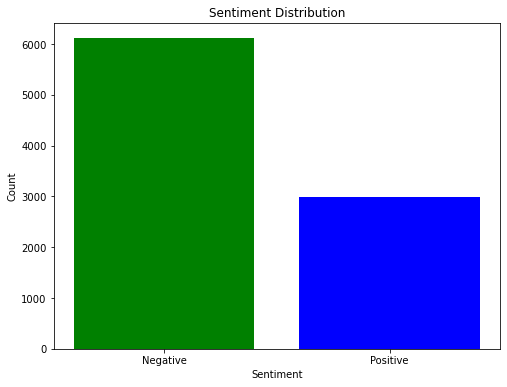

In [22]:
import matplotlib.pyplot as plt

sentiment_counts = df_cleaned['sentiment'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8,6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [23]:
# Splitting data for training and testing

from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned['tweet_text'], df_cleaned['sentiment'], test_size=0.2, random_state=42, stratify=df_cleaned['sentiment'])

In [24]:
# Vectorize Text data using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the tweet text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
# handling class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution after oversampling
print(f"Original training data distribution: {Counter(y_train)}")
print(f"Resampled training data distribution: {Counter(y_train_res)}")

Original training data distribution: Counter({'Negative': 4891, 'Positive': 2382})
Resampled training data distribution: Counter({'Negative': 4891, 'Positive': 4891})


# Model Selection and Evaluation


In [26]:
# Baseline Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='Positive')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='Positive')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='Positive')

# Print classification report for detailed evaluation
report_lr = classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive'])

print(report_lr)

              precision    recall  f1-score   support

    Negative       0.74      0.93      0.82      1223
    Positive       0.69      0.33      0.45       596

    accuracy                           0.73      1819
   macro avg       0.72      0.63      0.64      1819
weighted avg       0.72      0.73      0.70      1819



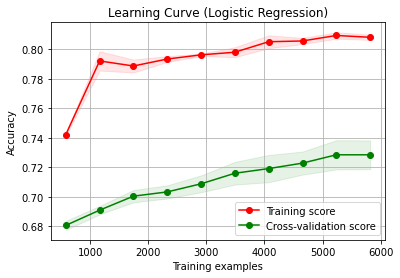

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the training and testing score curves with bands for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Positive')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Positive')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Positive')

# Print classification report for detailed evaluation
report_rf = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive'])


print(report_rf)

              precision    recall  f1-score   support

    Negative       0.75      0.90      0.82      1223
    Positive       0.66      0.39      0.49       596

    accuracy                           0.73      1819
   macro avg       0.70      0.65      0.66      1819
weighted avg       0.72      0.73      0.71      1819



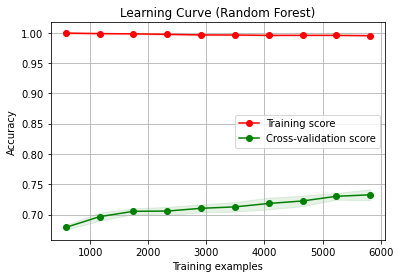

In [29]:
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the training and testing score curves with bands for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [30]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Positive')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Positive')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Positive')

# Print classification report for detailed evaluation
report_svm = classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive'])

print(report_svm)

              precision    recall  f1-score   support

    Negative       0.76      0.88      0.82      1223
    Positive       0.65      0.44      0.52       596

    accuracy                           0.74      1819
   macro avg       0.71      0.66      0.67      1819
weighted avg       0.73      0.74      0.72      1819



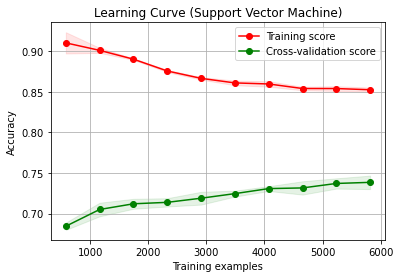

In [31]:
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (Support Vector Machine)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the training and testing score curves with bands for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Recommendation and Conclusion

Overview
The analysis of sentiment from tweets related to Apple and Google products was conducted using three machine learning models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). The evaluation of these models focused on their ability to classify sentiments as negative or positive, which is crucial for understanding customer perceptions and guiding strategic decisions.

Key Findings
Negative Sentiment Detection:

All models demonstrated strong performance in identifying negative sentiments, particularly with high recall rates. This indicates that negative feedback from users is effectively captured, which is essential for addressing customer concerns.
Positive Sentiment Challenges:

The models showed lower performance in recognizing positive sentiments, with recall rates indicating a potential gap in identifying positive customer experiences. This may result in missed opportunities to leverage favorable feedback.
Model Performance:

The Support Vector Machine (SVM) model outperformed the other models in both accuracy (0.74) and positive sentiment detection, making it the most reliable choice for our analysis.
Logistic Regression showed strong recall for negative sentiments, while Random Forest offered a balanced approach but did not significantly exceed the performance of the other models.

Recommendations

Adopt the SVM Model: Based on the findings, we recommend implementing the SVM model for sentiment analysis. Its superior performance in detecting both negative and positive sentiments makes it a valuable tool for understanding customer opinions.

Address Positive Sentiment Recognition: It is crucial to improve the model’s ability to identify positive sentiments. Consider strategies such as:

Data Augmentation: Increase the volume of positive sentiment examples in the training dataset.

Feature Engineering: Explore additional features or NLP techniques to better capture nuances in positive sentiments.

Monitor and Iterate: Regularly evaluate the model’s performance and adjust as necessary. This could involve retraining with new data or employing techniques to mitigate any identified biases.

Leverage Insights: Use the insights gained from sentiment analysis to inform marketing strategies, customer service enhancements, and product development. Addressing negative feedback promptly and promoting positive experiences can enhance brand reputation.

Conclusion

The sentiment analysis of tweets related to Apple and Google products provides valuable insights into customer perceptions. By implementing the SVM model and focusing on enhancing the detection of positive sentiments, we can better understand and respond to customer feedback. This proactive approach will empower us to improve customer satisfaction and loyalty, ultimately benefiting our brand in a competitive market.